In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [53]:
training = pd.read_csv('processedTrain.csv')
testing = pd.read_csv('processedTest.csv')

In [54]:
X_train = training.drop(['prognosis'],axis=1) # the training attributes
y_train = training['prognosis'] # the training labels

X_test = testing.drop(['prognosis'],axis=1) # the testing attributes
y_test = testing['prognosis'] # the testing labels


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier

In [56]:
lr = LogisticRegression(solver='liblinear',random_state=2021)
rf=RandomForestClassifier(random_state=2021,n_estimators=100)
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2021)
ada = AdaBoostClassifier(random_state=2021)
svc = SVC(random_state=2021)
xgb = XGBClassifier()
rc = RidgeClassifier(random_state=2021)

In [57]:
from sklearn.model_selection import StratifiedKFold
cv_strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [58]:
models = [lr,rf,knn,dt,ada,svc,rc,xgb] 

In [59]:
for i in models:
    model = i
    
    print('______________________________________________')
    print(i)
    print('..............................................')
    cv = cross_val_score(model,X_train,y_train,cv=cv_strat,n_jobs=-1)
    model.fit(X_test,y_test)
    test_score = model.score(X_test, y_test)
    print('Folds: ',cv)
    print('CV Accuracy score: ',cv.mean()*100)
    print('Test Accuracy score: ',test_score*100)
    


______________________________________________
LogisticRegression(random_state=2021, solver='liblinear')
..............................................
Folds:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV Accuracy score:  100.0
Test Accuracy score:  100.0
______________________________________________
RandomForestClassifier(random_state=2021)
..............................................
Folds:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV Accuracy score:  100.0
Test Accuracy score:  100.0
______________________________________________
KNeighborsClassifier()
..............................................
Folds:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV Accuracy score:  100.0
Test Accuracy score:  16.666666666666664
______________________________________________
DecisionTreeClassifier(random_state=2021)
..............................................
Folds:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV Accuracy score:  100.0
Test Accuracy score:  100.0
______________________________________________
AdaBoostClassifier(rand

______________________________________________
LogisticRegression(random_state=2021, solver='liblinear')
..............................................


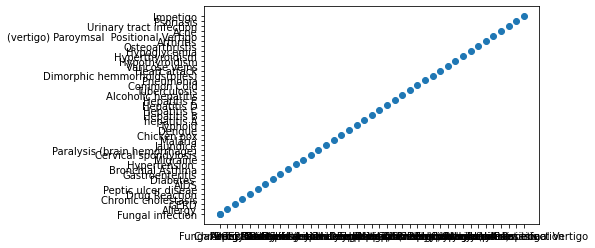

______________________________________________
RandomForestClassifier(random_state=2021)
..............................................


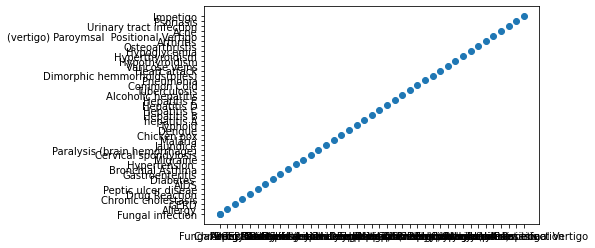

______________________________________________
KNeighborsClassifier()
..............................................


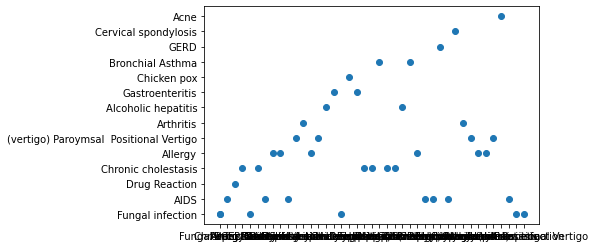

______________________________________________
DecisionTreeClassifier(random_state=2021)
..............................................


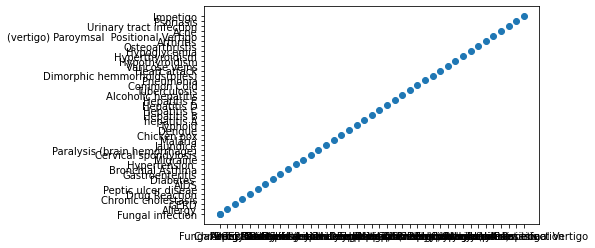

______________________________________________
AdaBoostClassifier(random_state=2021)
..............................................


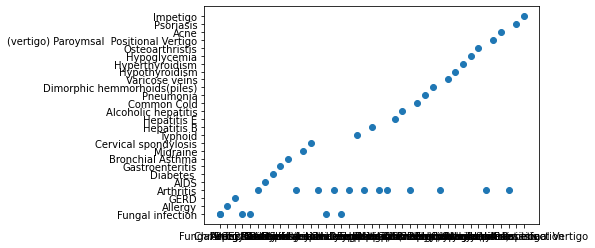

______________________________________________
SVC(random_state=2021)
..............................................


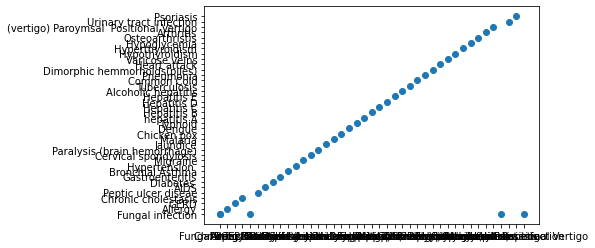

______________________________________________
RidgeClassifier(random_state=2021)
..............................................


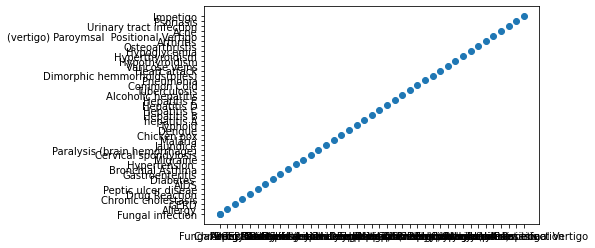

______________________________________________
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
..............................................


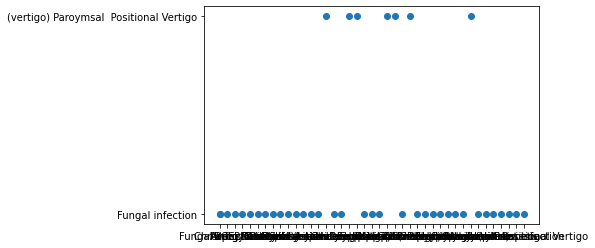

In [60]:
for i in models:
    print('______________________________________________')
    print(i)
    print('..............................................')
    prediction = i.predict(X_test)
    plt.scatter(y_test,prediction)
    plt.show()

In [61]:
from sklearn.metrics import confusion_matrix

______________________________________________
LogisticRegression(random_state=2021, solver='liblinear')
..............................................


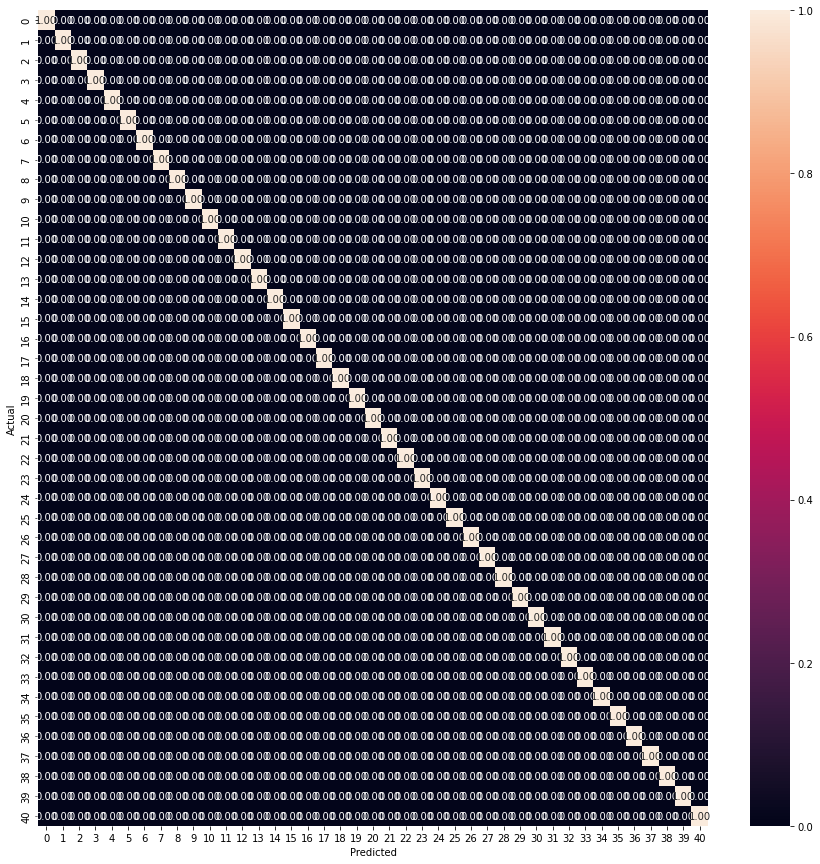

______________________________________________
RandomForestClassifier(random_state=2021)
..............................................


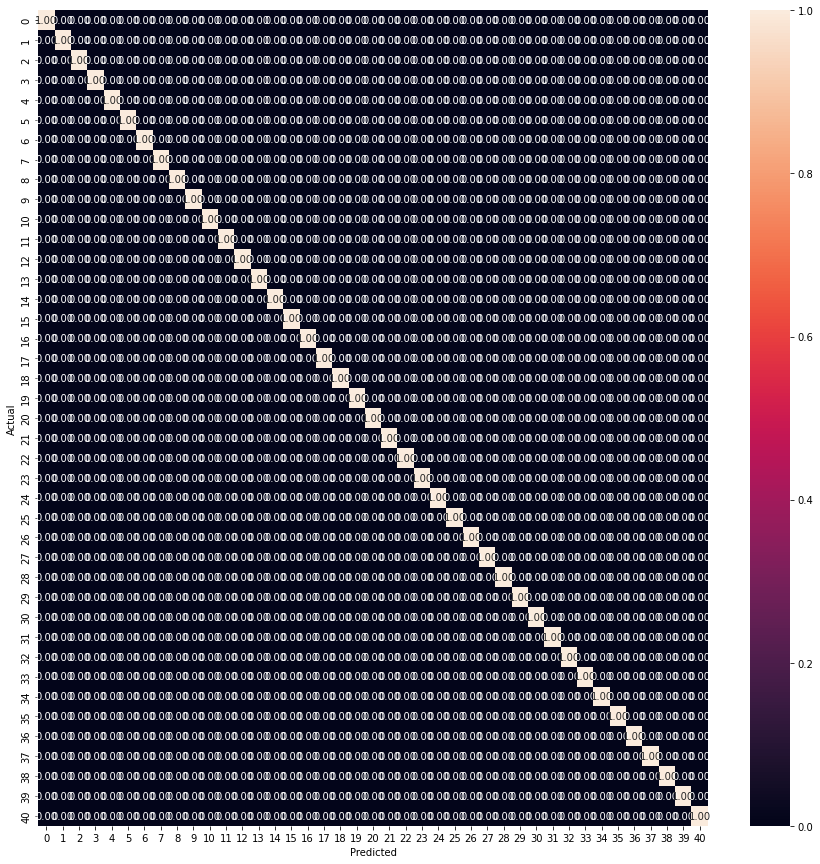

______________________________________________
KNeighborsClassifier()
..............................................


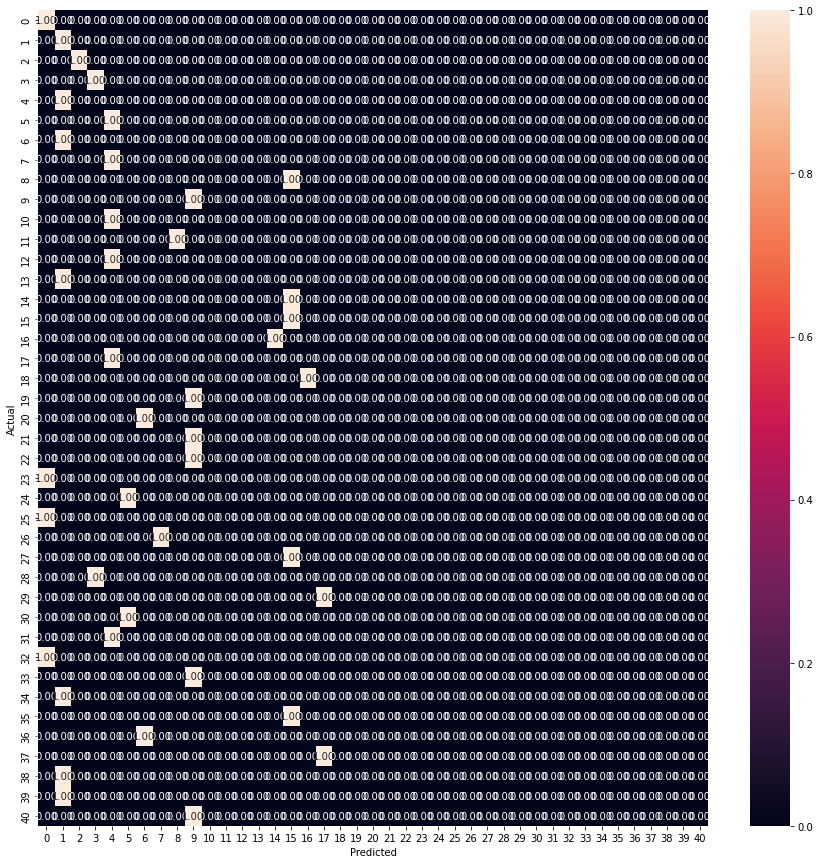

______________________________________________
DecisionTreeClassifier(random_state=2021)
..............................................


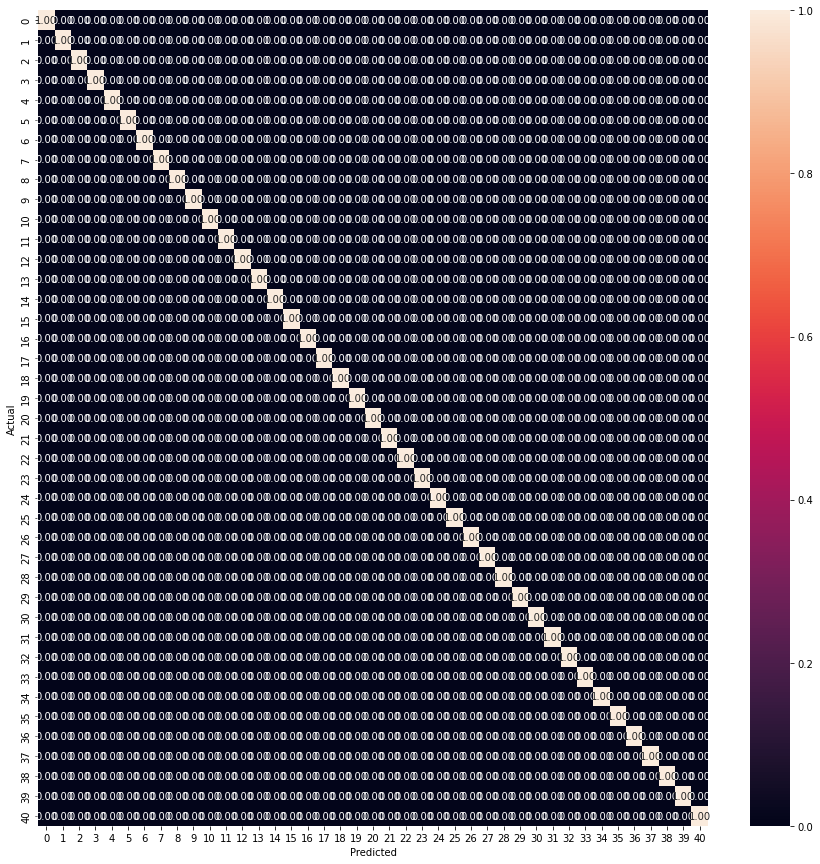

______________________________________________
AdaBoostClassifier(random_state=2021)
..............................................


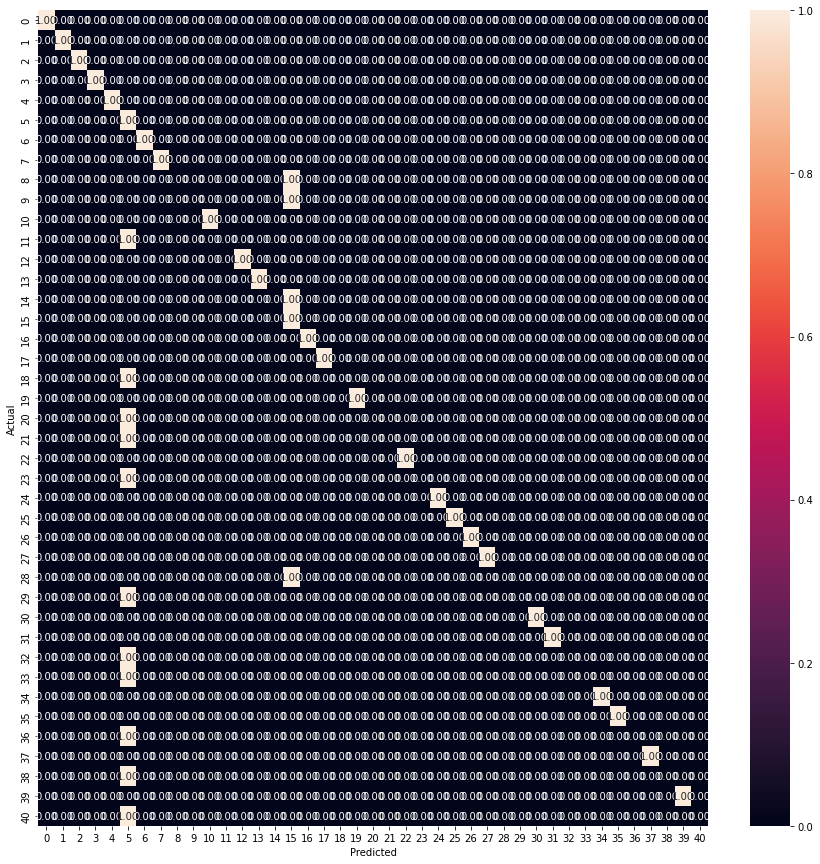

______________________________________________
SVC(random_state=2021)
..............................................


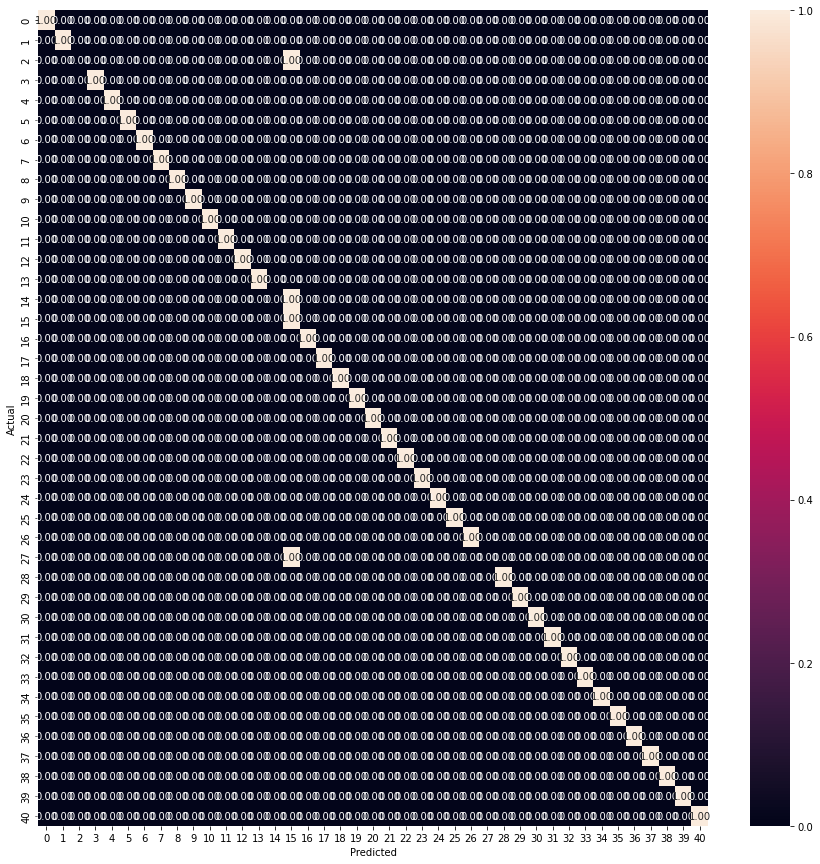

______________________________________________
RidgeClassifier(random_state=2021)
..............................................


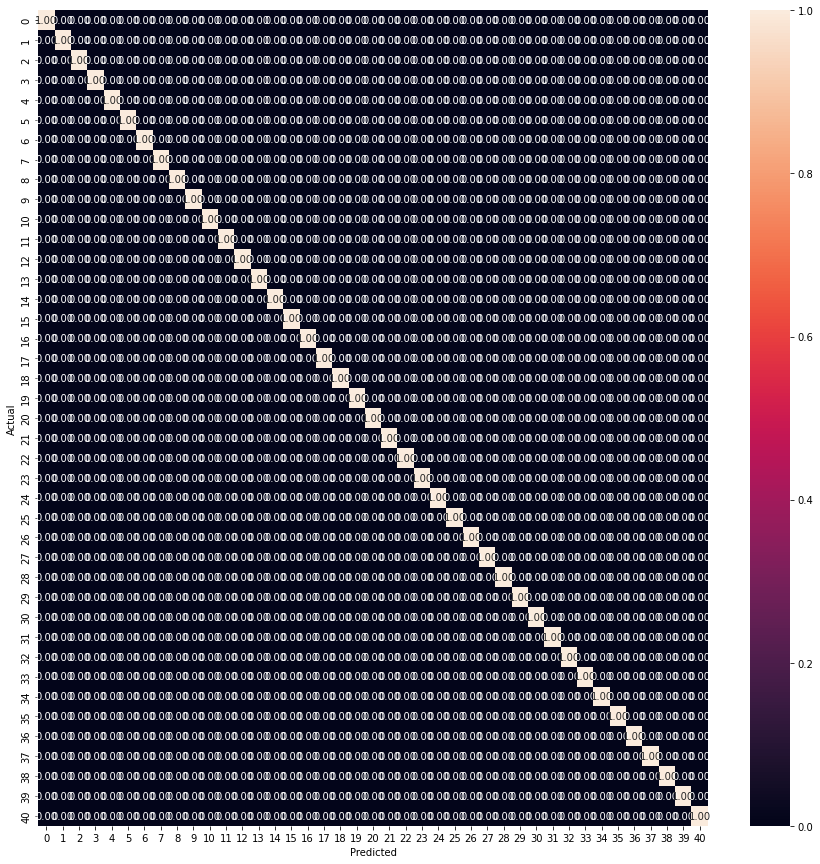

______________________________________________
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
..............................................


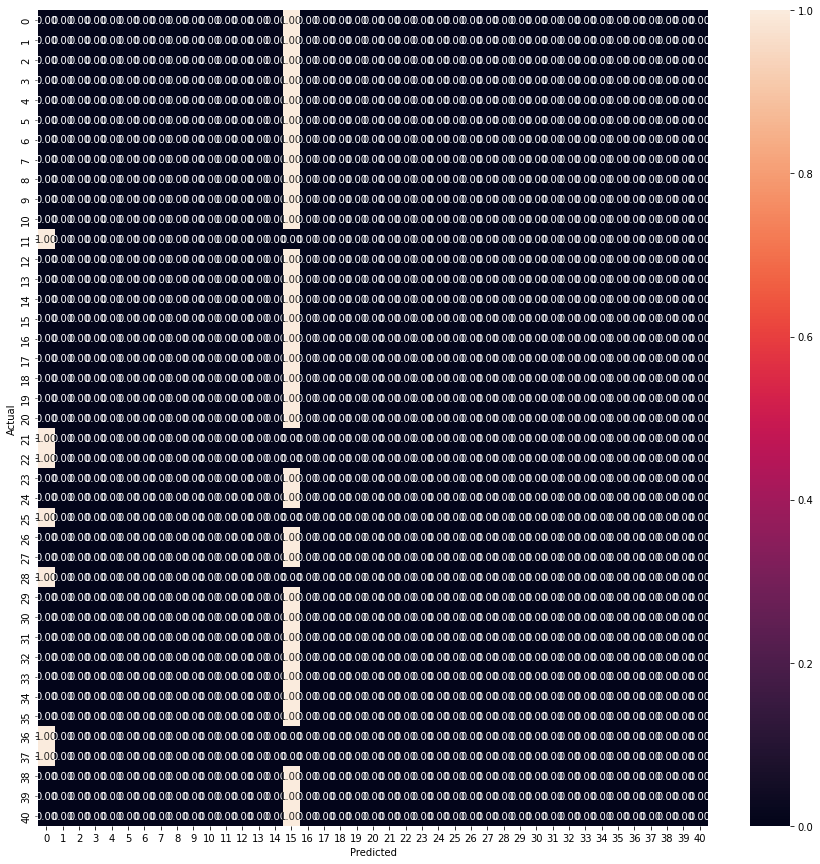

In [62]:
for i in models:
    print('______________________________________________')
    print(i)
    print('..............................................')
    y_pred = i.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(cmn, annot=True, fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

In [63]:
y_predlr = lr.predict(X_test)
y_predrf = rf.predict(X_test)
y_predknn = knn.predict(X_test)
y_preddt = dt.predict(X_test)
y_predada = ada.predict(X_test)
y_predsvc = svc.predict(X_test)
y_predrc = rc.predict(X_test)
y_predxgb = xgb.predict(X_test)

In [64]:
#For LR
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predlr))
print(classification_report(y_test, y_predlr))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predlr))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [65]:
#For RF
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predrf))
print(classification_report(y_test, y_predrf))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predrf))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [66]:
#For ADA
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predada))
print(classification_report(y_test, y_predada))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ada.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predada))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       0.08      1.00      0.15         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.00      0.00      0.00         1
                    Chronic cholestasis       0.00      0.00      0.0

In [71]:
# combine list of symptoms and their feature importance into a 2D array
imp = rf.feature_importances_
columns = list(training.columns)
columns = columns[:131]
column_names = ['symptom', 'importance']
df3 = np.vstack((columns, imp)).T
df3 = pd.DataFrame(df3, columns = column_names)
df3.sort_values(by='importance',ascending=True)

,symptom,importance
104,polyuria,0.000986075722798965
15,weight_gain,0.000987439914246877
72,swollen_extremeties,0.0010161120209910737
125,silver_like_dusting,0.0018141672027199246
69,puffy_face_and_eyes,0.0018277525556415087
...,...,...
11,vomiting,0.022663116988338908
31,headache,0.02469541161235492
14,fatigue,0.024820974549335947
0,itching,0.025639053270424265
